# Read & visualize raster image using xarray

*Written by: Men Vuthy, 2022*

---

You can also run the code here in Google Colab. Try clicking button below:

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1vGTewC4kjxpQrVndB-WDv-Zep_L-hRDw#scrollTo=nZSlx9c1ROyu)

#### Objective

*   Read raster file using `xrray` module.
*   Visualize raster data in different style and color composites.



#### Code

Install necessary packages

`!pip install rasterio`

Import necessary modules

In [2]:
import numpy as np
import rasterio
import xarray as xr
import matplotlib.pyplot as plt
%matplotlib inline

Load and read raster data using `xr.open_rasterio`

In [3]:
# Load raster file
raster = xr.open_rasterio("https://github.com/mapbox/rasterio/raw/1.2.1/tests/data/RGB.byte.tif")

In [4]:
#  Read raster variable
raster

<xarray.DataArray (band: 3, y: 718, x: 791)>
[1703814 values with dtype=uint8]
Coordinates:
  * band     (band) int64 1 2 3
  * y        (y) float64 2.827e+06 2.826e+06 2.826e+06 ... 2.612e+06 2.612e+06
  * x        (x) float64 1.021e+05 1.024e+05 1.027e+05 ... 3.389e+05 3.392e+05
Attributes:
    transform:      (300.0379266750948, 0.0, 101985.0, 0.0, -300.041782729805...
    crs:            +init=epsg:32618
    res:            (300.0379266750948, 300.041782729805)
    is_tiled:       0
    nodatavals:     (0.0, 0.0, 0.0)
    scales:         (1.0, 1.0, 1.0)
    offsets:        (0.0, 0.0, 0.0)
    AREA_OR_POINT:  Area

In [5]:
# Read array inside raster variable
print('The shape of raster is:', raster.variable.data.shape)

raster.variable.data

The shape of raster is: (3, 718, 791)


array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=uint8)

As you can see, there are 3 bands (RGB) with the shape y=718 and x=791 along with other information in Coordinates and Attributes. 

Let's plot this array to see how it looks using basic function `plt.imshow()` in `matplotlib` package. To plot array using `matplotlib`, the input shape must be (y, x, band). Since our input shape is (band=3, y=718, x=791), we must transpose it to a correct shape using `numpy.transpose` function in `numpy` module.

In [6]:
# Transpose array and set name as 'image'
image = raster.variable.data.transpose(1, 2, 0)

print(image.shape)

(718, 791, 3)


Now, we can simply plot the array using the code snippet below:

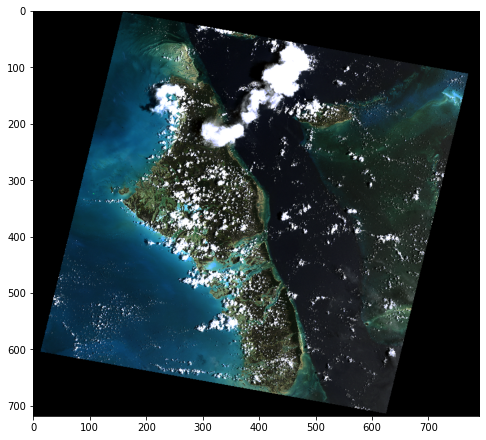

In [7]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
ax.imshow(image)
plt.show()

**Composite Image**

In [8]:
# Read each band from raster image
red = raster.variable.data[0]
green = raster.variable.data[1]
blue = raster.variable.data[2]

Now we have read each band array from the image. To make composite, we can use numpy function called `np.dstack()`.

In [9]:
# Natural color composite
Natural_color = np.dstack((red, green, blue))

# False color composite
False_color = np.dstack((blue, green, red))

Since we have defined the variable for natural and false colors, we can plot them with `matplotlib` module. Here is how we do it:

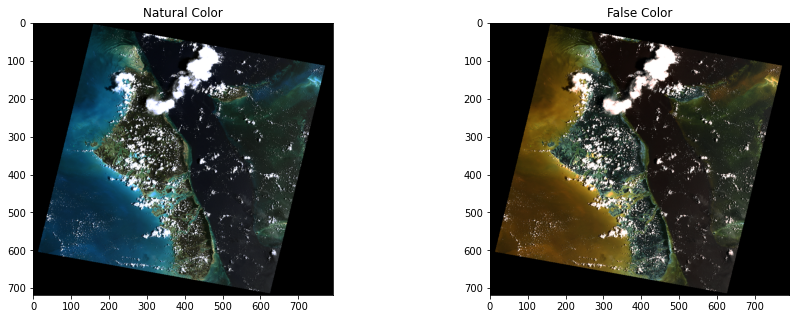

In [10]:
# Create empty figure with 2 subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot 1
ax1.imshow(Natural_color)
ax1.set_title('Natural Color')

# Plot 2
ax2.imshow(False_color)
ax2.set_title('False Color')

plt.show()

Finally, we can see how raster image is read with `xarray` and plotted using `matplotlib`.

---



**Reference**

*  xarray: https://xarray.pydata.org/en/stable/

